<a href="https://colab.research.google.com/github/sbooeshaghi/BMGP_2020/blob/main/analysis/notebooks/10xCRISPR/10xCRISPR_trim_len.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!date

Tue Jun  8 16:46:08 UTC 2021


In [2]:
!rm -rf BMGP_2020
!git clone https://github.com/sbooeshaghi/BMGP_2020.git

Cloning into 'BMGP_2020'...
remote: Enumerating objects: 302, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 302 (delta 0), reused 0 (delta 0), pack-reused 296
Receiving objects: 100% (302/302), 341.93 MiB | 31.78 MiB/s, done.
Resolving deltas: 100% (91/91), done.
Checking out files: 100% (81/81), done.


In [3]:
import sys
COLAB = "google.colab" in sys.modules

if COLAB:
  !pip install --quiet \
  kb-python==0.26.0 \
  anndata==0.7.6 \

     |████████████████████████████████| 59.1MB 73kB/s 
     |████████████████████████████████| 133kB 35.5MB/s 
     |████████████████████████████████| 13.2MB 43.4MB/s 
     |████████████████████████████████| 10.3MB 22.0MB/s 
     |████████████████████████████████| 51kB 8.1MB/s 
     |████████████████████████████████| 81kB 11.4MB/s 
     |████████████████████████████████| 112kB 62.3MB/s 
     |████████████████████████████████| 1.2MB 46.1MB/s 
     |████████████████████████████████| 71kB 10.5MB/s 


In [5]:
# extract everything
!cd /content/BMGP_2020/data/10xCRISPR/kite/ && tar -xf counts_filtered.tar.gz && tar -xf counts_unfiltered.tar.gz
!cd /content/BMGP_2020/data/10xCRISPR/kite_0/ && tar -xf counts_filtered.tar.gz && tar -xf counts_unfiltered.tar.gz
!cd /content/BMGP_2020/data/10xCRISPR/kite_1/ && tar -xf counts_filtered.tar.gz && tar -xf counts_unfiltered.tar.gz
!cd /content/BMGP_2020/data/10xCRISPR/kite_2/ && tar -xf counts_filtered.tar.gz && tar -xf counts_unfiltered.tar.gz
!cd /content/BMGP_2020/data/10xCRISPR/kite_3/ && tar -xf counts_filtered.tar.gz && tar -xf counts_unfiltered.tar.gz
!cd /content/BMGP_2020/data/10xCRISPR/kite_4/ && tar -xf counts_filtered.tar.gz && tar -xf counts_unfiltered.tar.gz

In [6]:
!gunzip /content/BMGP_2020/data/10xCRISPR/cr/raw_feature_bc_matrix/*

In [7]:
!cat /content/BMGP_2020/data/10xCRISPR/cr/raw_feature_bc_matrix/xa* > \
/content/BMGP_2020/data/10xCRISPR/cr/raw_feature_bc_matrix/matrix.mtx

In [8]:
!mv /content/BMGP_2020/data/10xCRISPR/cr/raw_feature_bc_matrix ./

In [9]:
!pip install --no-deps -i https://test.pypi.org/simple/ diffmx==0.0.5

Looking in indexes: https://test.pypi.org/simple/


# Imports

In [13]:
import anndata
from scipy.io import mmread, mmwrite
from kb_python.utils import import_matrix_as_anndata
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from diffmx import plot, compare
from diffmx.utils import nd, yex, overlay_anndatas

fsize = 18

plt.rcParams.update({'font.size': fsize})

%config InlineBackend.figure_format = 'retina'

colors = {
    "kb": "black",
    "cs": "red"
}

In [12]:
path = "/content/BMGP_2020/data/10xCRISPR/kite/counts_unfiltered/adata.h5ad"
path_0 = "/content/BMGP_2020/data/10xCRISPR/kite_0/counts_unfiltered/adata.h5ad"
path_1 = "/content/BMGP_2020/data/10xCRISPR/kite_1/counts_unfiltered/adata.h5ad"
path_2 = "/content/BMGP_2020/data/10xCRISPR/kite_2/counts_unfiltered/adata.h5ad"
path_3 = "/content/BMGP_2020/data/10xCRISPR/kite_3/counts_unfiltered/adata.h5ad"
path_4 = "/content/BMGP_2020/data/10xCRISPR/kite_4/counts_unfiltered/adata.h5ad"

kb = anndata.read_h5ad(path)
kb_0 = anndata.read_h5ad(path_0)
kb_1 = anndata.read_h5ad(path_1)
kb_2 = anndata.read_h5ad(path_2)
kb_3 = anndata.read_h5ad(path_3)
kb_4 = anndata.read_h5ad(path_4)

In [14]:
all_kb = overlay_anndatas(kb, kb_0, kb_1, kb_2, kb_3, kb_4)

In [15]:
all_kb

AnnData object with n_obs × n_vars = 209218 × 90
    var: 'feature_name'
    layers: 0, 1, 2, 3, 4, 5

In [16]:
mat_path = "/content/raw_feature_bc_matrix/matrix.mtx"
bcs_path = "/content/raw_feature_bc_matrix/barcodes.tsv"
ftr_path = "/content/raw_feature_bc_matrix/features_1_col.tsv"
t2g_path = "/content/BMGP_2020/references/10xCRISPR/kite/f2b.txt"

raw_cr = import_matrix_as_anndata(mat_path, bcs_path, ftr_path, t2g_path=t2g_path)
raw_cr.obs.index = raw_cr.obs.index.str.slice(0, 16).values

In [18]:
bcs_path = "/content/BMGP_2020/data/10xCRISPR/kite_0/counts_filtered/cells_x_features.barcodes.txt"
df = pd.read_csv(bcs_path, names=["bcs"], header=None)

In [20]:
common = np.intersect1d(np.intersect1d(raw_cr.obs.index.values, all_kb.obs.index.values), df.bcs.values)

In [23]:
kb = all_kb[all_kb.obs.index.isin(common)]
cr = raw_cr[raw_cr.obs.index.isin(common)]

In [24]:
print(kb)
print(cr)

View of AnnData object with n_obs × n_vars = 2799 × 90
    var: 'feature_name'
    layers: 0, 1, 2, 3, 4, 5
View of AnnData object with n_obs × n_vars = 2799 × 36694
    var: 'gene_name'


In [25]:
common_genes = np.intersect1d(kb.var.index.values, cr.var.index.values)

In [26]:
kb = kb[:,kb.var.index.isin(common_genes)].copy()
cr = cr[:,cr.var.index.isin(common_genes)].copy()

In [27]:
print(kb)
print(cr)

AnnData object with n_obs × n_vars = 2799 × 90
    var: 'feature_name'
    layers: 0, 1, 2, 3, 4, 5
AnnData object with n_obs × n_vars = 2799 × 90
    var: 'gene_name'


In [28]:
False in kb.obs.index.values == cr.obs.index.values

False

In [29]:
False in kb.var.index.values == cr.var.index.values

False

In [30]:
print(kb)
print(cr)

AnnData object with n_obs × n_vars = 2799 × 90
    var: 'feature_name'
    layers: 0, 1, 2, 3, 4, 5
AnnData object with n_obs × n_vars = 2799 × 90
    var: 'gene_name'


# Visualizations

In [31]:
labels = ["kb", "cr"]
colors = ["#e41a1c", "#377eb8"]

## Knee

In [37]:
from matplotlib import cm

In [69]:
colors = [cm.get_cmap("tab20")(i) for i in range(7)]
labels = ["kb"] + [f"kb_{i}" for i in range(5)] + ["cr"]

In [70]:
labels

['kb', 'kb_0', 'kb_1', 'kb_2', 'kb_3', 'kb_4', 'cr']

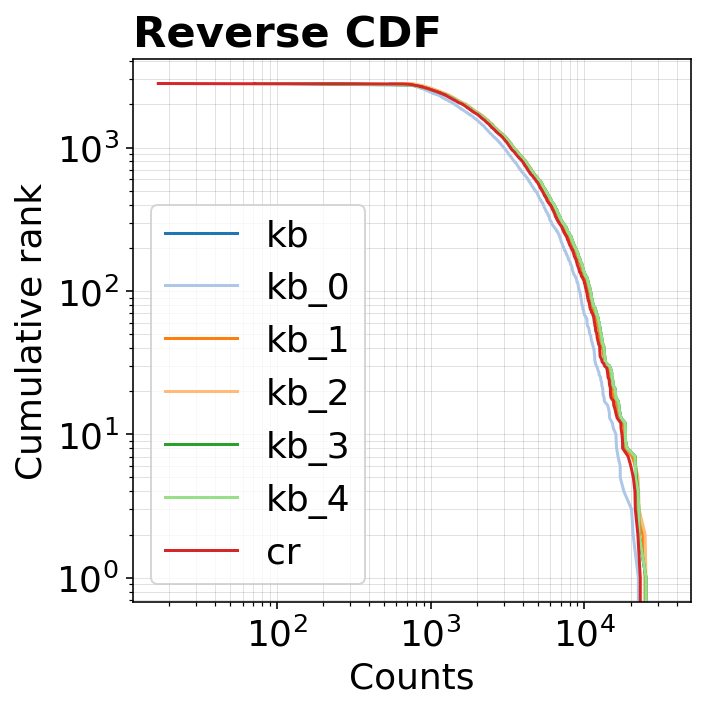

In [71]:
fig, ax = plt.subplots(figsize=(5,5))

X = compare.rev_cdf(*list(kb.layers.values()), cr.X, axis=1)
plot.rev_cdf(*X, ax=ax, colors = colors, labels=labels)

fig.show()

## pseudobulk

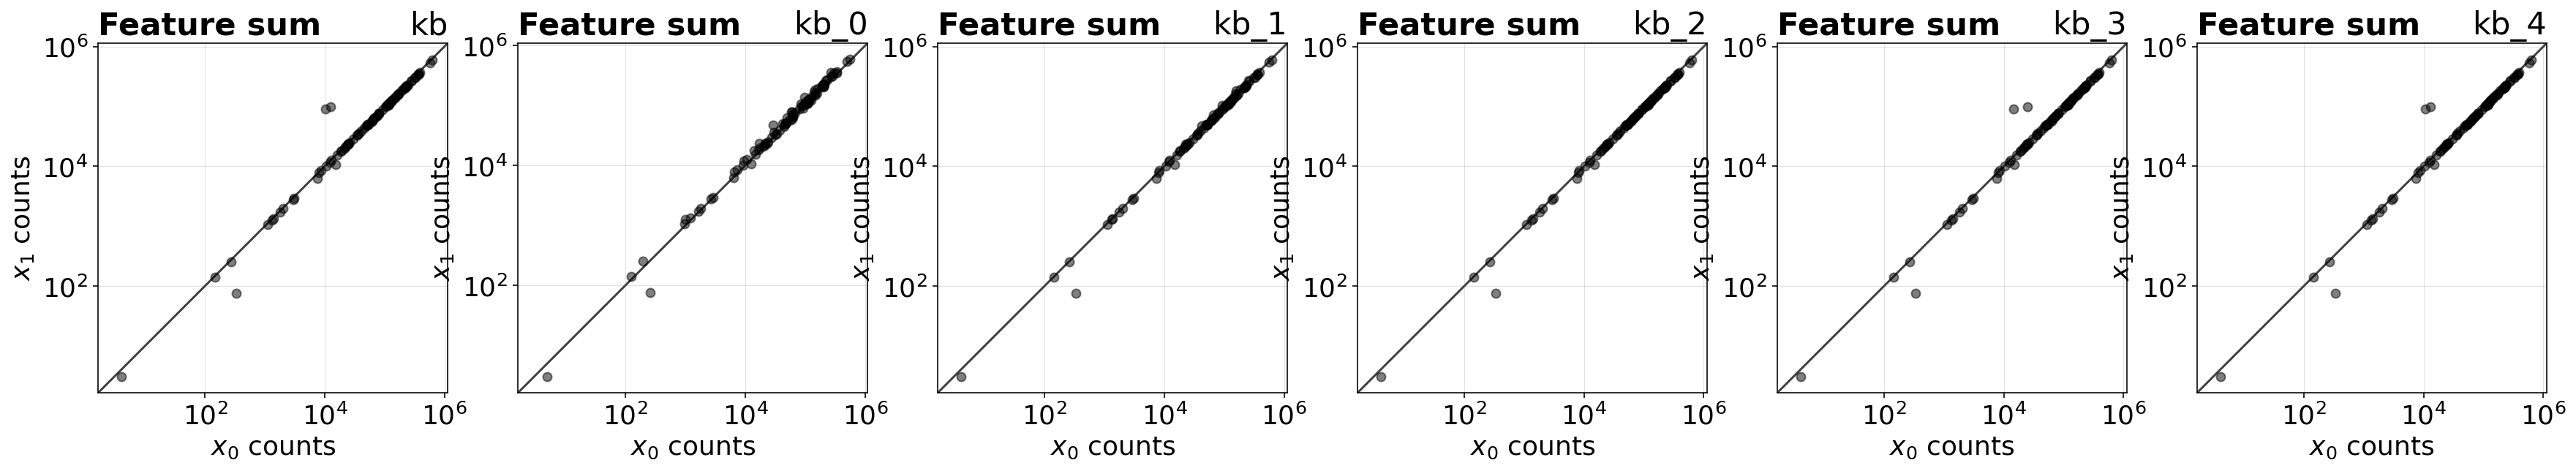

In [81]:
nplots = len(labels)-1
fig, axs = plt.subplots(figsize=(5*nplots,5), ncols=nplots)

for i, ax in enumerate(axs):
  x0, x1 = compare.cmp_sum(kb.layers[i], cr.X, axis=0)
  plot.cmp_sum(x0, x1, ax=ax, alpha=0.5)
  ax.set_title(labels[i], loc="right")

fig.show()

# Pseudobulk - cell

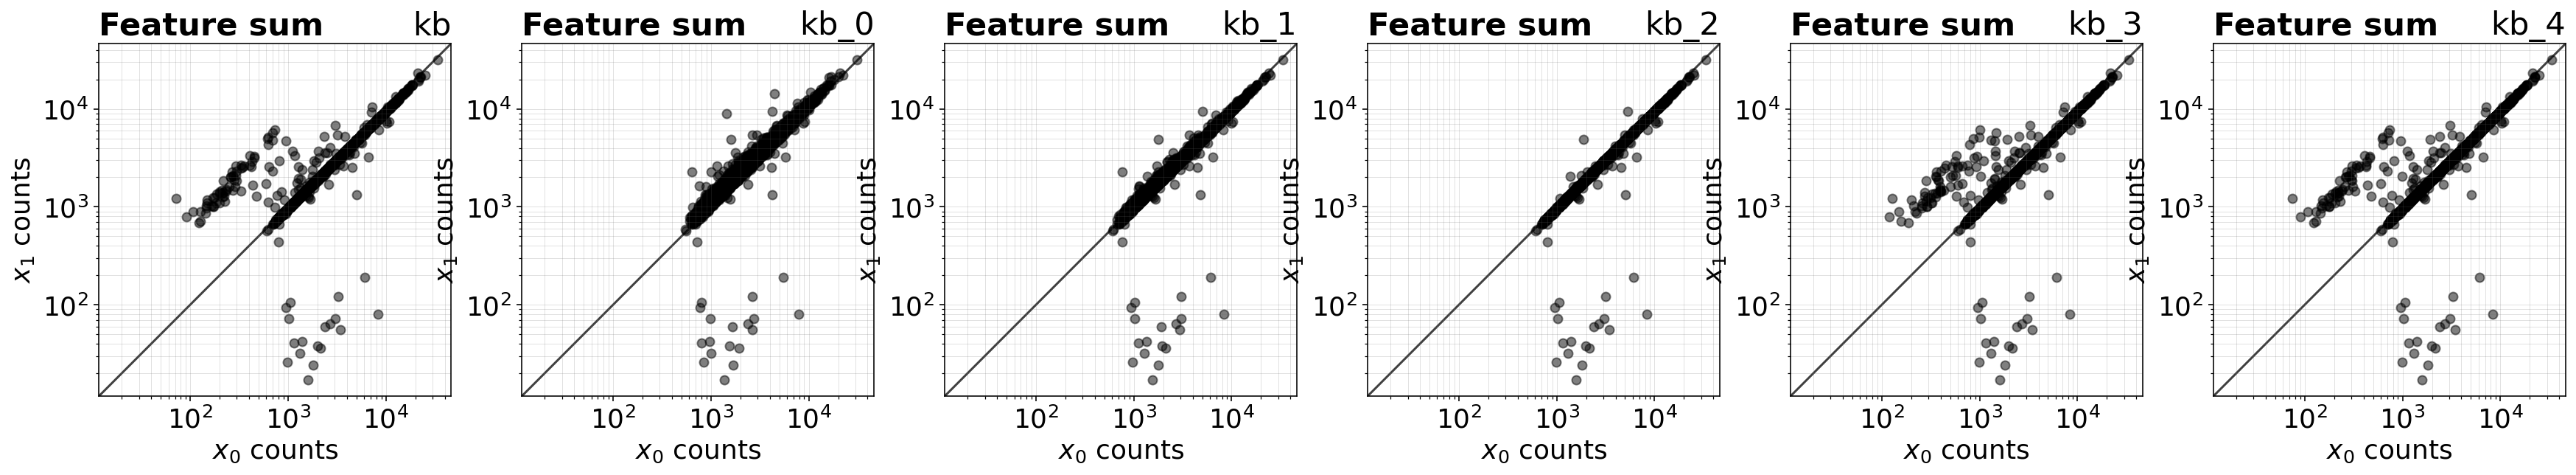

In [75]:
nplots = len(labels)-1
fig, axs = plt.subplots(figsize=(5*nplots,5), ncols=nplots)

for i, ax in enumerate(axs):
  x0, x1 = compare.cmp_sum(kb.layers[i], cr.X, axis=1)
  plot.cmp_sum(x0, x1, ax=ax, alpha=0.5)
  ax.set_title(labels[i], loc="right")

fig.show()

# Feature correlation

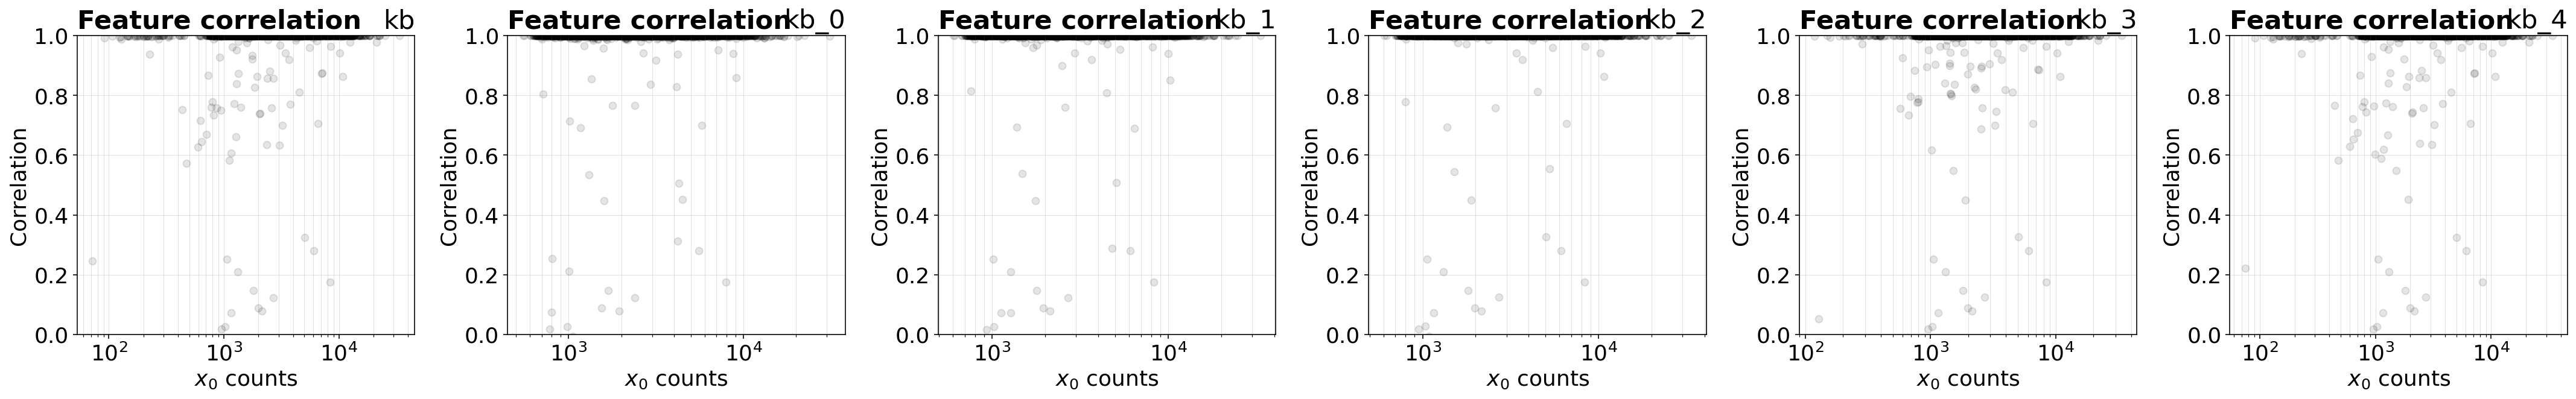

In [78]:
fig, axs = plt.subplots(figsize=(5*nplots,5), ncols=nplots)

for i, ax in enumerate(axs):
  x0, corr = compare.features_correlated(kb.layers[i], cr.X)
  plot.features_correlated(x0, corr, ax=ax)

  ax.set_title(labels[i], loc="right")
fig.tight_layout()
fig.show()

### $l_1$ dist

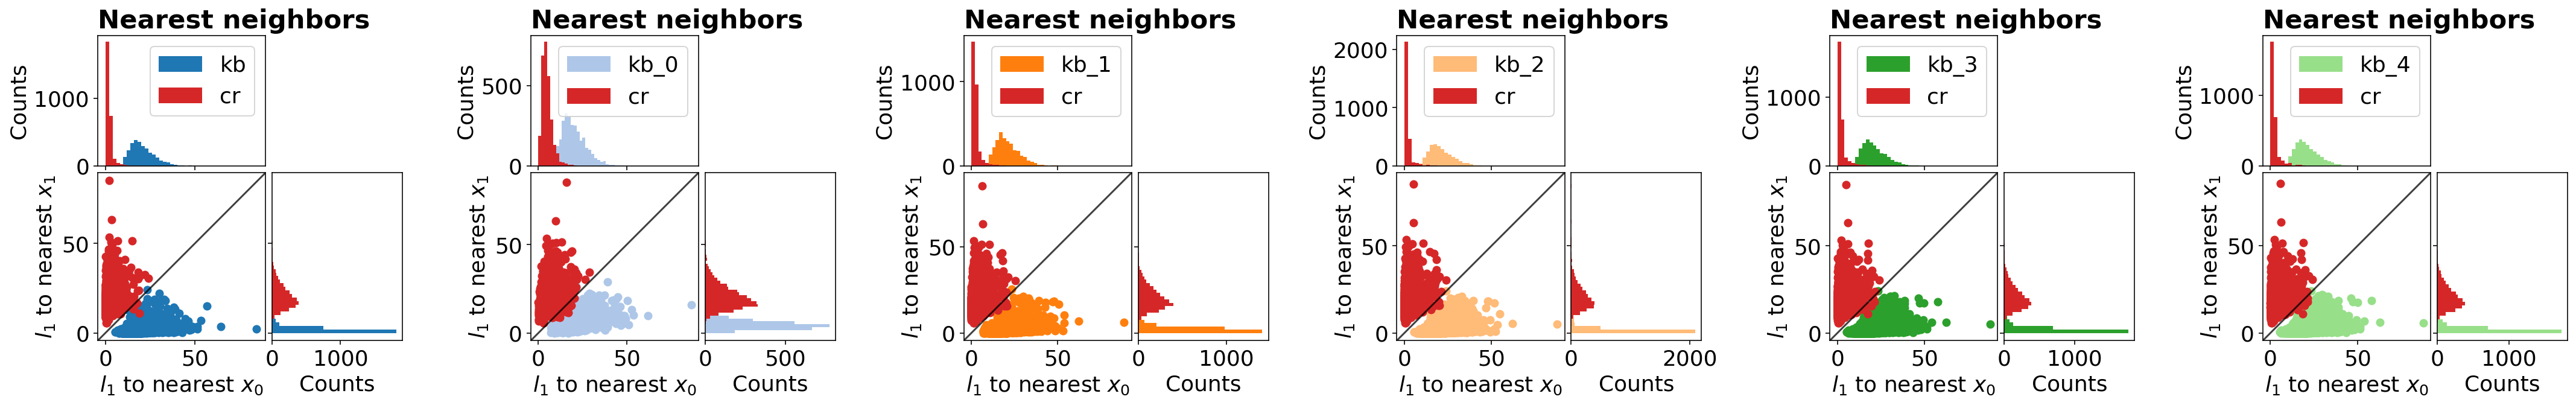

In [80]:
fig, axs = plt.subplots(figsize=(5*nplots,5), ncols=nplots)

for i, ax in enumerate(axs):
  # logged counts
  XX_XY = compare.l1_distance(np.log1p(kb.layers[i]), np.log1p(cr.X))
  YY_YX = compare.l1_distance(np.log1p(cr.X), np.log1p(kb.layers[i]))
  plot.l1_nearest_neighbor(XX_XY, YY_YX, 
                          ax=ax, 
                          labels=[labels[i], "cr"], 
                          colors=[colors[i], colors[-1]])
fig.tight_layout()
fig.show()

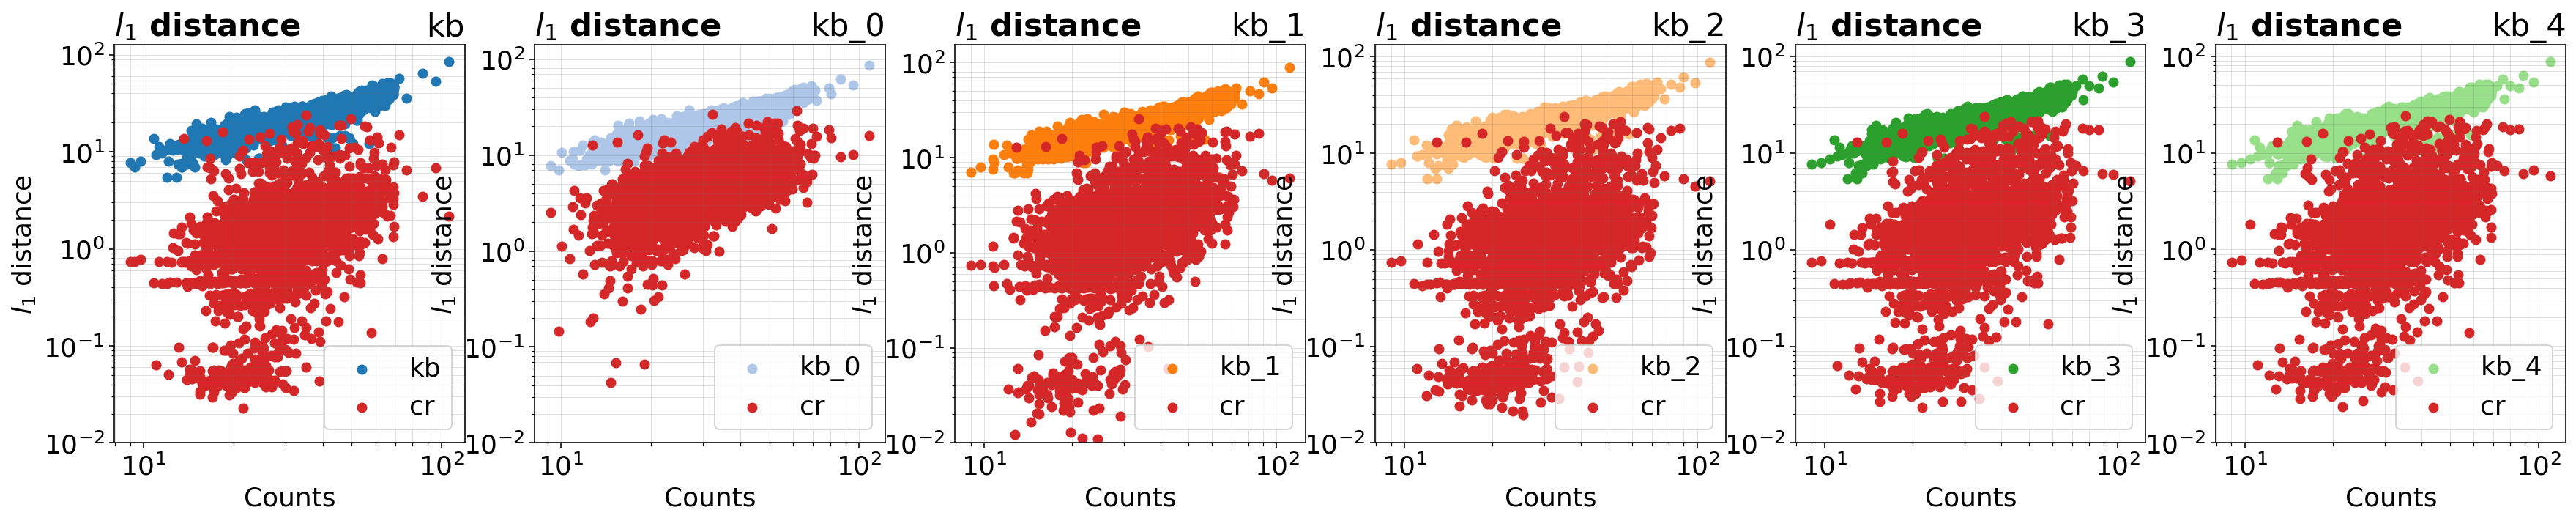

In [83]:
fig, axs = plt.subplots(figsize=(5*nplots,5), ncols=nplots)

for i, ax in enumerate(axs):
  XX, XY = compare.l1_distance(np.log1p(kb.layers[i]), np.log1p(cr.X))
  YY, YX = compare.l1_distance(np.log1p(cr.X), np.log1p(kb.layers[i]))
  # logged counts
  cnts = compare.sum_features(np.log1p(kb.layers[i]), axis=1)

  plot.l1_counts((cnts, XX), (cnts, XY), 
                ax=ax, 
                labels=[labels[i], "cr"], 
                colors=[colors[i], colors[-1]])
  ax.set(**{"ylim": 0.01})
  ax.set_title(labels[i], loc="right")
  
fig.show()